<a href="https://colab.research.google.com/github/Nikhil5566/Data-Science-Portfolio-Projects/blob/main/Fertility%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fertility Dataset

# Introduction & Key Insights


----
Understanding the Fertility Dataset: An Overview

This dataset contains 100 observations and 10 features related to male fertility, aiming to understand factors that might influence a 'Normal' or 'Altered' diagnosis. The features capture a range of information, including seasonal influences, age, childhood diseases, history of accidents or surgical interventions, fever episodes, alcohol consumption habits, smoking habits, and daily sitting hours. Our initial data inspection revealed a clean dataset with no missing values and minimal duplicates, ensuring a solid foundation for analysis. A significant observation was the class imbalance in the target variable, 'Diagnosis', with 88 'Normal' cases and only 12 'Altered' cases.

Key Insights from Exploration and Statistics

`Sitting Hours and Fertility:` One of the most interesting initial hypotheses was whether sitting kills fertility. Our t-test revealed that, despite the 'Altered' group having slightly fewer average sitting hours (7.7 hours) compared to the 'Normal' group (11.2 hours), this difference was not statistically significant (P-value = 0.7326). This suggests that, based on this dataset, daily sitting time does not appear to be a major standalone factor influencing fertility diagnosis.

`Age Distribution:` The age of participants ranges from 27 to 36, with an average of around 30 years. There wasn't a stark difference in age distribution between 'Normal' and 'Altered' diagnosis groups.

Categorical Influences: Visualizations showed that 'Season' was predominantly 'spring' and 'fall', while 'Childish diseases' and 'Surgical intervention' were prevalent. When looking at these factors against the 'Diagnosis', no single categorical feature immediately stood out as a strong predictor on its own. For instance, 'Childish diseases' being 'yes' was common in both diagnosis groups, though a slightly higher proportion of 'Altered' diagnoses appeared when 'High fevers in the last year' was 'no' or 'less than 3 months ago'. Similarly, specific smoking or alcohol consumption habits didn't show an overwhelmingly clear separation between 'Normal' and 'Altered' diagnoses at first glance.

Machine Learning: The AI Doctor's Perspective

We trained a Random Forest Classifier to act as an 'AI Doctor' and predict the fertility diagnosis. The model achieved an overall accuracy of 95%. However, this high accuracy is largely driven by the model's excellent performance on the majority 'Normal' class (18 out of 18 correctly predicted). For the minority 'Altered' class, the model correctly identified 1 out of 2 cases, indicating a recall of 50%. This highlights the challenge of predicting rare events in imbalanced datasets.

Most Influential Factors (from AI Doctor): The feature importance plot revealed that 'Number of hours spent sitting per day' and 'Age' were ranked as the top two most important factors by the model, followed by 'Season_winter', 'Surgical intervention_yes', and 'Accident or serious trauma_yes'. While the t-test suggested sitting hours aren't statistically significant in isolation, the machine learning model considers it among the most impactful features when combined with others to make a prediction. This discrepancy often points to complex, non-linear interactions between features that simple statistical tests might miss.

`In Summary:` The dataset provides valuable insights into potential fertility factors. While direct statistical links were not found for sitting hours, the machine learning model suggests it, along with age and certain medical histories, plays a role in predicting fertility diagnosis when considered together. Addressing the class imbalance and exploring more sophisticated models or feature engineering could further enhance the 'AI Doctor's' diagnostic capabilities.

----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d muhamedyoussry/fertility-data-set

# Unziping the downloaded file
!unzip fertility-data-set.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/muhamedyoussry/fertility-data-set
License(s): unknown
  0% 0.00/1.08k [00:00<?, ?B/s]
100% 1.08k/1.08k [00:00<00:00, 4.46MB/s]
Archive:  fertility-data-set.zip
  inflating: fertility.csv           


# Data Inspection

In [ ]:
df = pd.read_csv('fertility.csv')
df.head(11)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered
5,spring,30,yes,no,yes,more than 3 months ago,once a week,occasional,9,Normal
6,spring,30,no,no,no,less than 3 months ago,once a week,never,8,Normal
7,spring,36,yes,yes,yes,more than 3 months ago,several times a week,never,7,Normal
8,fall,30,no,no,yes,more than 3 months ago,once a week,never,5,Normal
9,fall,29,yes,no,no,more than 3 months ago,hardly ever or never,never,5,Normal


In [ ]:
df.tail(11)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
89,spring,33,yes,yes,yes,more than 3 months ago,hardly ever or never,daily,7,Normal
90,spring,33,yes,yes,yes,no,once a week,never,7,Normal
91,summer,32,yes,no,no,more than 3 months ago,hardly ever or never,daily,1,Normal
92,summer,32,yes,yes,no,more than 3 months ago,once a week,never,7,Normal
93,summer,32,yes,no,yes,more than 3 months ago,once a week,never,8,Altered
94,fall,28,yes,no,no,more than 3 months ago,several times a week,daily,9,Normal
95,winter,30,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
96,winter,29,yes,no,no,more than 3 months ago,once a week,occasional,9,Normal
97,winter,30,yes,yes,yes,more than 3 months ago,hardly ever or never,never,6,Normal
98,winter,30,yes,no,yes,more than 3 months ago,hardly ever or never,occasional,3,Normal


In [ ]:
df.shape

(100, 10)

In [ ]:
df.columns

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day', 'Diagnosis'],
      dtype='object')

In [ ]:
df.dtypes

,0
Season,object
Age,int64
Childish diseases,object
Accident or serious trauma,object
Surgical intervention,object
High fevers in the last year,object
Frequency of alcohol consumption,object
Smoking habit,object
Number of hours spent sitting per day,int64
Diagnosis,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Season,100,4,spring,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100.0,NaN,NaN,NaN,30.11,2.246861,27.0,28.0,30.0,32.0,36.0
Childish diseases,100,2,yes,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accident or serious trauma,100,2,no,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surgical intervention,100,2,yes,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High fevers in the last year,100,3,more than 3 months ago,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency of alcohol consumption,100,5,hardly ever or never,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking habit,100,3,never,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of hours spent sitting per day,100.0,NaN,NaN,NaN,10.8,33.616975,1.0,5.0,7.0,9.0,342.0
Diagnosis,100,2,Normal,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Season,0
Age,0
Childish diseases,0
Accident or serious trauma,0
Surgical intervention,0
High fevers in the last year,0
Frequency of alcohol consumption,0
Smoking habit,0
Number of hours spent sitting per day,0
Diagnosis,0


In [ ]:
df.duplicated().sum()

np.int64(1)

# Statistics Analysis

--- 1. HYPOTHESIS: DOES SITTING KILL FERTILITY? (T-TEST) ---
Comparing 'Number of hours spent sitting per day' across 'Diagnosis' groups.



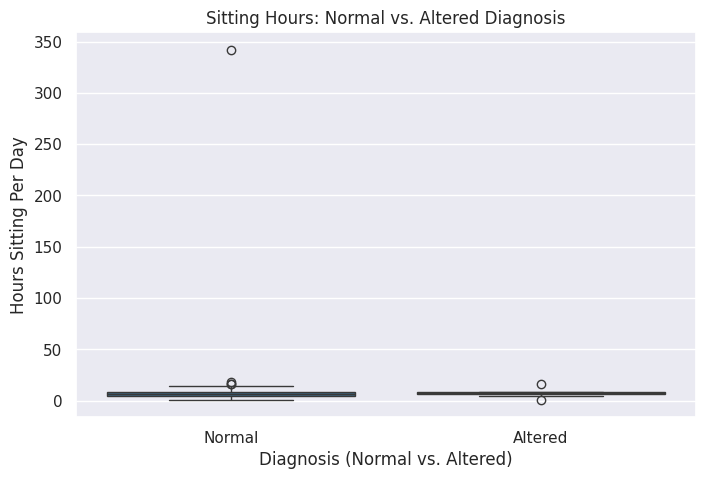

📊 Average Sitting Hours (Normal):  11.2 hours
📊 Average Sitting Hours (Altered): 7.7 hours
📉 P-Value: 0.7326

❌ NULL RESULT: Sitting time does not appear to be a major factor.


In [ ]:
from scipy import stats

print("--- 1. HYPOTHESIS: DOES SITTING KILL FERTILITY? (T-TEST) ---")

# 1. Identify Columns (Explicitly define for clarity and robustness)
target_col_name = 'Diagnosis'
sitting_col_name = 'Number of hours spent sitting per day'

print(f"Comparing '{sitting_col_name}' across '{target_col_name}' groups.\n")

# 2. Split the Data into Groups
group_normal = df[df[target_col_name] == 'Normal'][sitting_col_name]
group_altered = df[df[target_col_name] == 'Altered'][sitting_col_name]

# 3. Visualizing the Difference
plt.figure(figsize=(8, 5))
sns.boxplot(x=target_col_name, y=sitting_col_name, data=df, palette='viridis')
plt.title('Sitting Hours: Normal vs. Altered Diagnosis')
plt.xlabel('Diagnosis (Normal vs. Altered)')
plt.ylabel('Hours Sitting Per Day')
plt.show()

# 4. The Statistical Test
if len(group_altered) > 1:
    t_stat, p_val = stats.ttest_ind(group_normal, group_altered)

    print(f"📊 Average Sitting Hours (Normal):  {group_normal.mean():.1f} hours")
    print(f"📊 Average Sitting Hours (Altered): {group_altered.mean():.1f} hours")
    print(f"📉 P-Value: {p_val:.4f}")

    if p_val < 0.05:
        print("\n✅ SIGNIFICANT RESULT: Sitting time is statistically linked to fertility issues.")
    else:
        print("\n❌ NULL RESULT: Sitting time does not appear to be a major factor.")
else:
    print("⚠️ Not enough 'Altered' samples to run a reliable T-Test. This usually indicates a very small number of altered samples in the dataset for this specific test.")

# Univariate Analysis

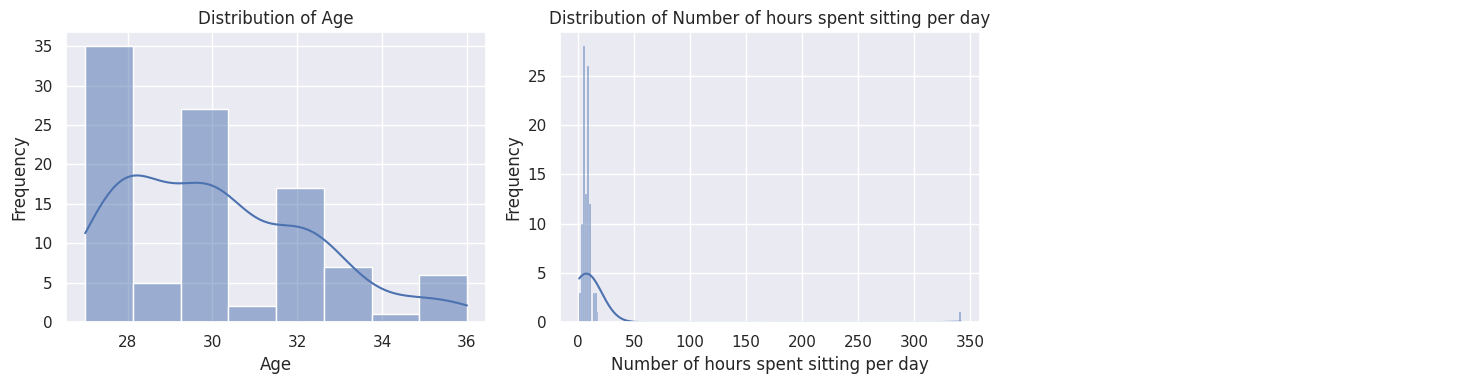

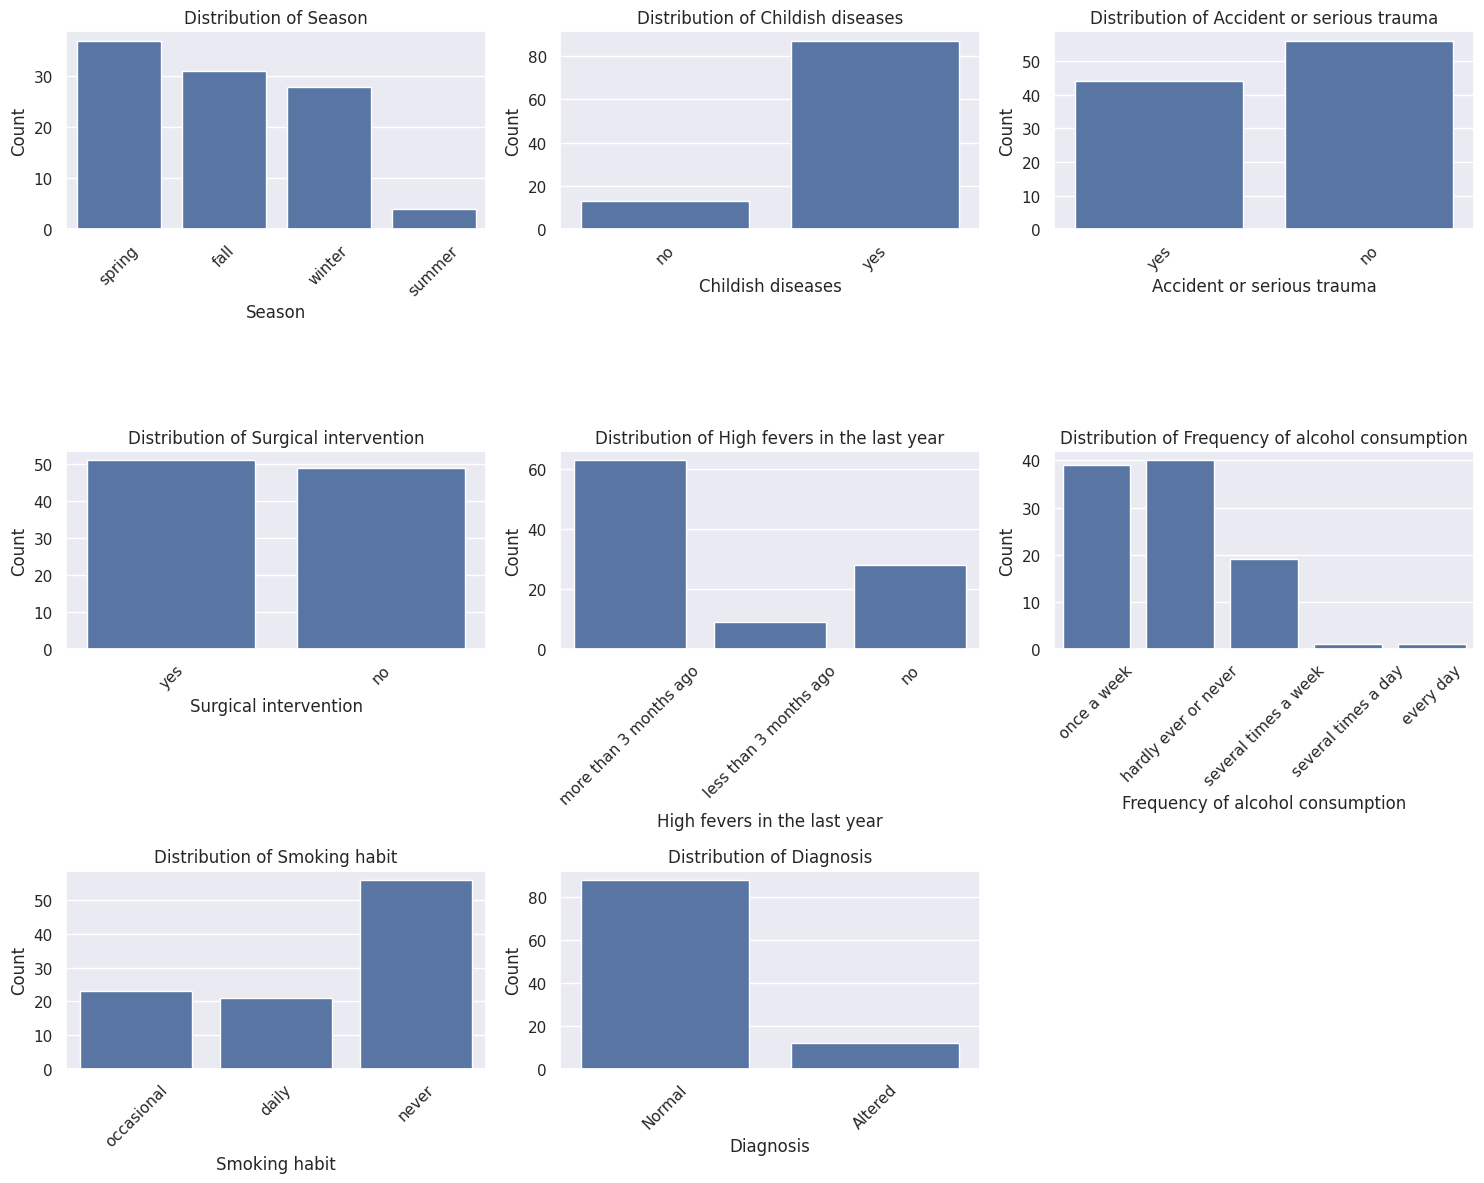

--- Categorical Value Counts ---

Value counts for Season:
Season
spring    37
fall      31
winter    28
summer     4
Name: count, dtype: int64

Value counts for Childish diseases:
Childish diseases
yes    87
no     13
Name: count, dtype: int64

Value counts for Accident or serious trauma:
Accident or serious trauma
no     56
yes    44
Name: count, dtype: int64

Value counts for Surgical intervention:
Surgical intervention
yes    51
no     49
Name: count, dtype: int64

Value counts for High fevers in the last year:
High fevers in the last year
more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: count, dtype: int64

Value counts for Frequency of alcohol consumption:
Frequency of alcohol consumption
hardly ever or never    40
once a week             39
several times a week    19
several times a day      1
every day                1
Name: count, dtype: int64

Value counts for Smoking habit:
Smoking habit
never         56
occasional    23
daily     

In [ ]:
import math

# --- 1. Numerical Columns (Histograms in a Grid) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    # Define grid size
    num_plots = len(numerical_cols)
    num_cols = 3  # You can change this to 2 or 4 if preferred
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate and plot
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hidding any unused subplots (if total plots < grid cells)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


# --- 2. Categorical Columns (Countplots in a Grid) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    # Define grid size
    num_plots = len(categorical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterate and plot
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # --- 3. Value Counts (Text Output) ---
    print("--- Categorical Value Counts ---")
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns found.")

# Bivariate Analysis

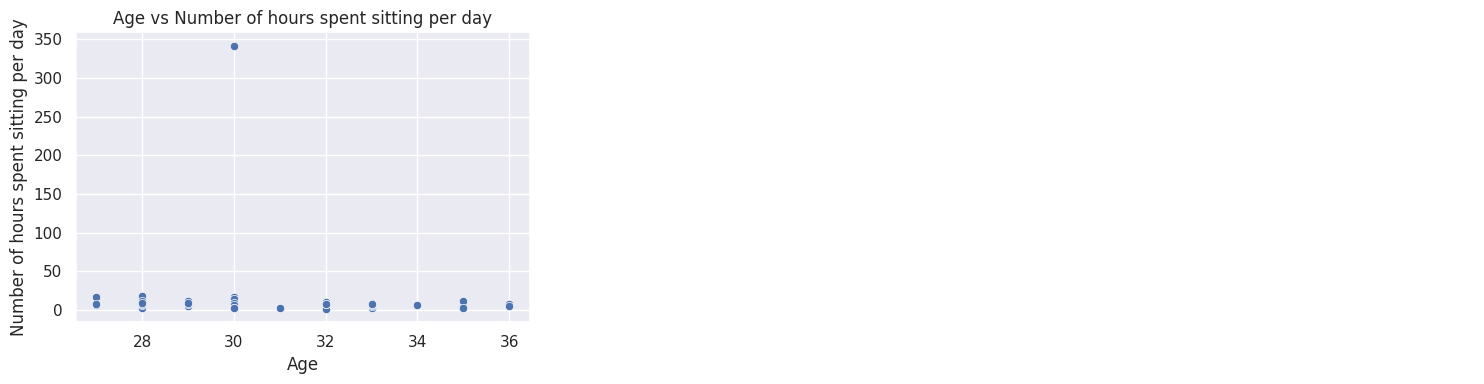

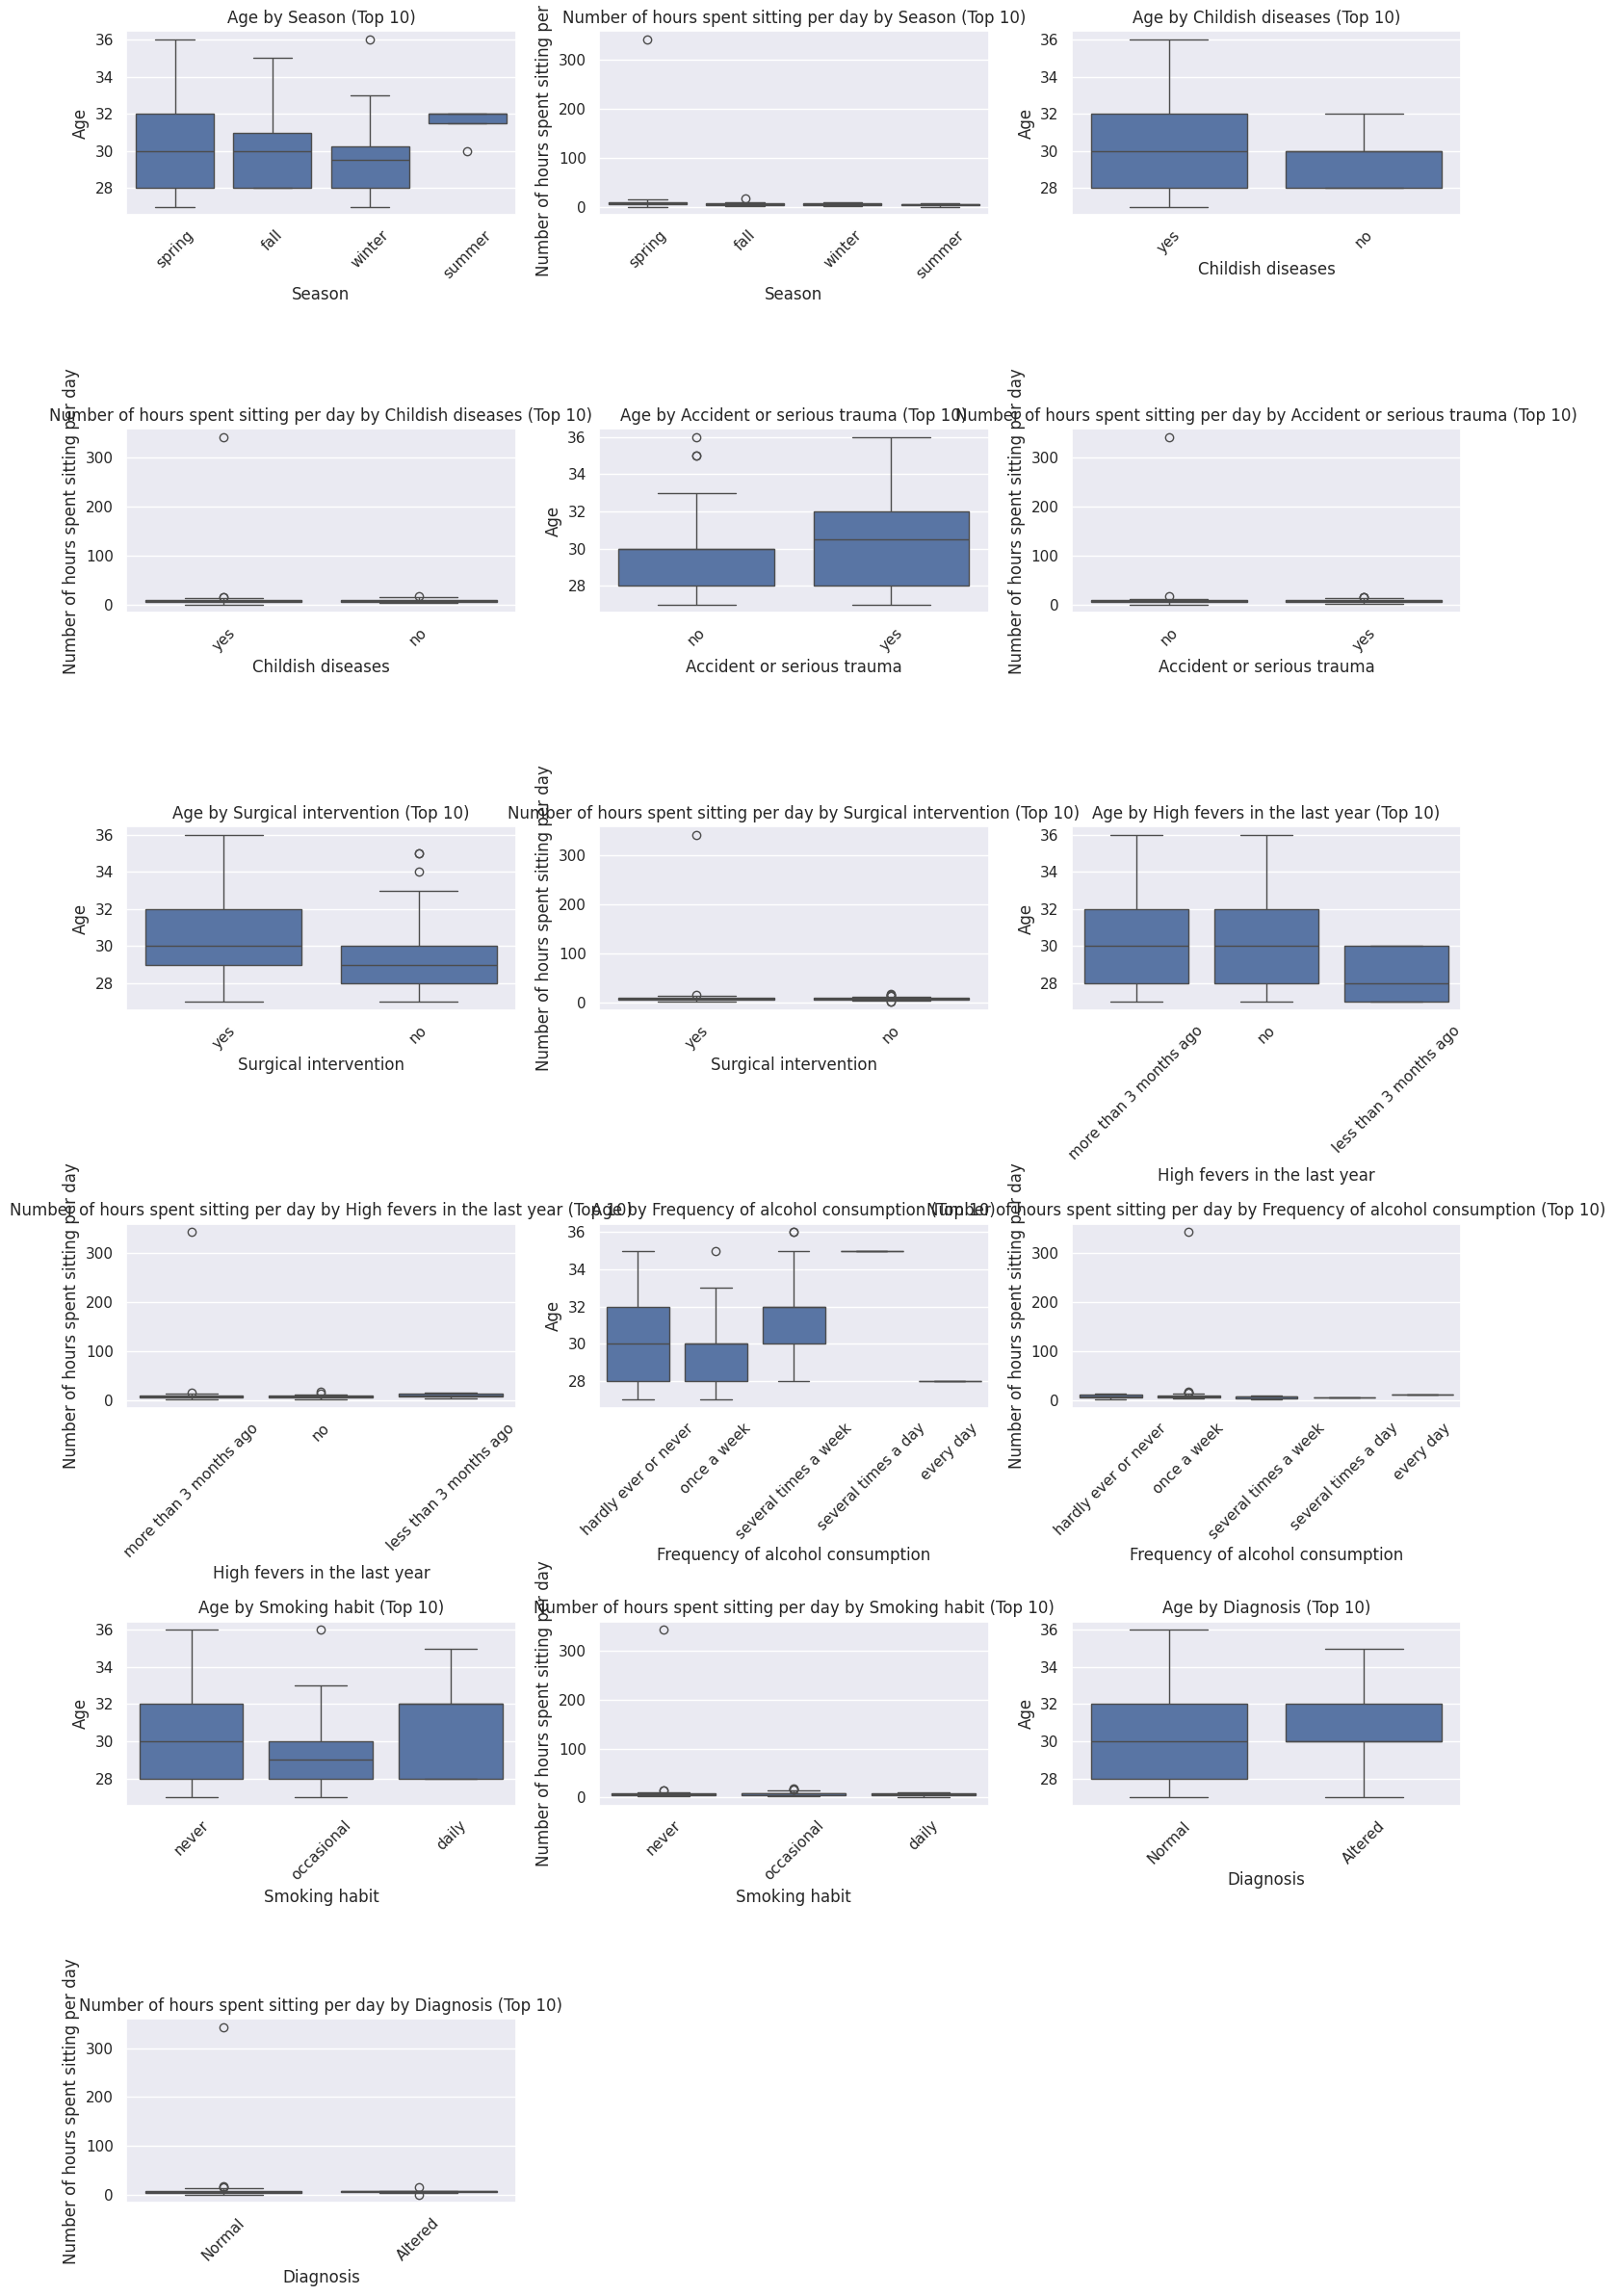

In [ ]:
import itertools

# --- 1. Numerical-Numerical Relationships (Scatter Plots) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all unique pairs of numerical columns
num_pairs = list(itertools.combinations(numerical_cols, 2))

if len(num_pairs) > 0:
    # Define grid size
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes]) # If it's a single Axes object (e.g., 1x1 plot), make it an array
    else:
        axes = axes.flatten() # Flatten if it's already an array (1D or 2D)

    # Iterate through pairs and plot
    for i, (col1, col2) in enumerate(num_pairs):
        # Only plot if there's an available Axes object in the flattened array
        if i < len(axes):
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
            axes[i].set_title(f'{col1} vs {col2}')
            axes[i].set_xlabel(col1)
            axes[i].set_ylabel(col2)
        else:
            break # Stop if we run out of axes (shouldn't happen with correct num_rows/cols)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plots.")


# --- 2. Categorical-Numerical Relationships (Box Plots) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all pairs of (Categorical, Numerical)
cat_num_pairs = list(itertools.product(categorical_cols, numerical_cols))

if len(cat_num_pairs) > 0:
    # Define grid size
    num_plots = len(cat_num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (cat_col, num_col) in enumerate(cat_num_pairs):
        if i < len(axes):
            # 1. Get top 10 categories based on frequency
            top_categories = df[cat_col].value_counts().nlargest(10).index.tolist()

            # 2. Filter data: Keep only top categories AND ensure numerical column is not NaN
            filtered_df = df[df[cat_col].isin(top_categories) & df[num_col].notnull()]

            # 3. Update 'order' to only include categories that exist in the filtered data
            # This prevents the ValueError where a category in 'order' has no data to plot
            valid_categories = [cat for cat in top_categories if cat in filtered_df[cat_col].unique()]

            if valid_categories:
                sns.boxplot(data=filtered_df, x=cat_col, y=num_col, ax=axes[i], order=valid_categories)
                axes[i].set_title(f'{num_col} by {cat_col} (Top 10)')
                axes[i].set_xlabel(cat_col)
                axes[i].set_ylabel(num_col)
                axes[i].tick_params(axis='x', rotation=45)
            else:
                 axes[i].text(0.5, 0.5, "No valid data", ha='center', va='center', transform=axes[i].transAxes)
        else:
            break

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical-numerical pairs found.")

# Multivariate Analysis

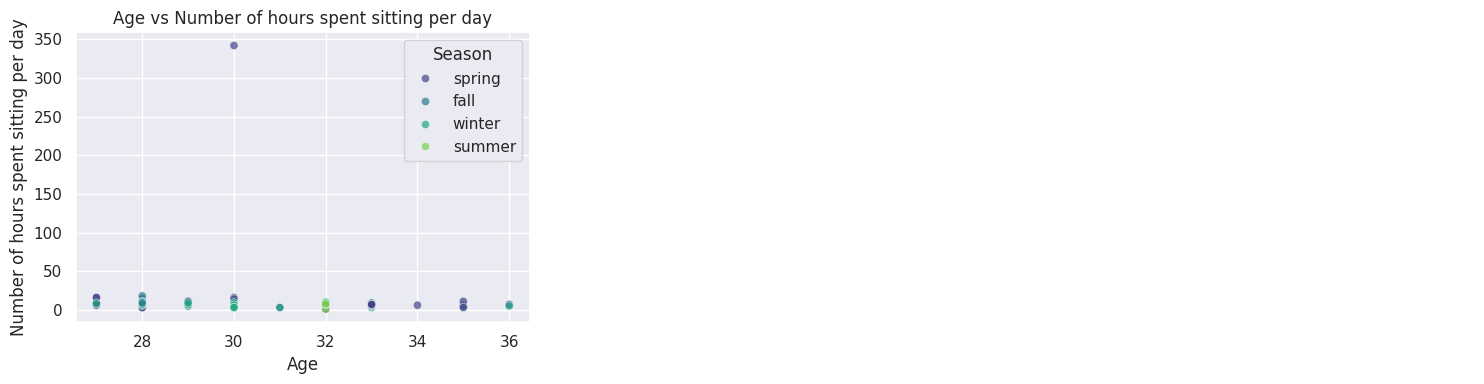


--- Multivariate Summary by 'Season' (Loop Form) ---
Displaying mean values of numerical features for each category in 'Season':

Category: spring
Age                                      30.351351
Number of hours spent sitting per day    17.189189
dtype: float64
------------------------------
Category: fall
Age                                      30.032258
Number of hours spent sitting per day     7.290323
dtype: float64
------------------------------
Category: winter
Age                                      29.678571
Number of hours spent sitting per day     7.000000
dtype: float64
------------------------------
Category: summer
Age                                      31.5
Number of hours spent sitting per day     5.5
dtype: float64
------------------------------


In [ ]:
import itertools
import math

# --- 1. Multivariate Scatter Plots (Grid with Hue) ---

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# We need at least 2 numerical columns and 1 categorical column to create this plot
if len(numerical_cols) >= 2 and len(categorical_cols) >= 1:
    # Use the first categorical column for the hue
    hue_col = categorical_cols[0]

    # Generate all unique pairs of numerical columns
    num_pairs = list(itertools.combinations(numerical_cols, 2))

    # Define grid size
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    # Using consistent size (5x4 per plot) as previous analyses
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes]) # If it's a single Axes object (e.g., 1x1 plot), make it an array
    else:
        axes = axes.flatten() # Flatten if it's already an array (1D or 2D)

    # Iterate and plot
    for i, (col1, col2) in enumerate(num_pairs):
        sns.scatterplot(data=df, x=col1, y=col2, hue=hue_col, ax=axes[i], alpha=0.7, palette='viridis')
        axes[i].set_title(f'{col1} vs {col2}')
        axes[i].set_xlabel(col1)
        axes[i].set_ylabel(col2)
        # Legend handling: keeping it simple for grid
        # axes[i].legend(loc='upper right', title=hue_col)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for multivariate scatter plots.")


# --- 2. Multivariate Summary (Loop Form - Text Output) ---
# This mimics the 'Loop Form' textual analysis from previous steps

if len(categorical_cols) >= 1:
    hue_col = categorical_cols[0]
    print(f"\n--- Multivariate Summary by '{hue_col}' (Loop Form) ---")
    print(f"Displaying mean values of numerical features for each category in '{hue_col}':\n")

    # Loop through each category
    unique_cats = df[hue_col].unique()
    for cat in unique_cats:
        print(f"Category: {cat}")
        # Filter data and calculate mean
        subset = df[df[hue_col] == cat]
        print(subset[numerical_cols].mean())
        print("-" * 30)
else:
    print("No categorical column for loop summary.")

# Deeper-Diagnosis

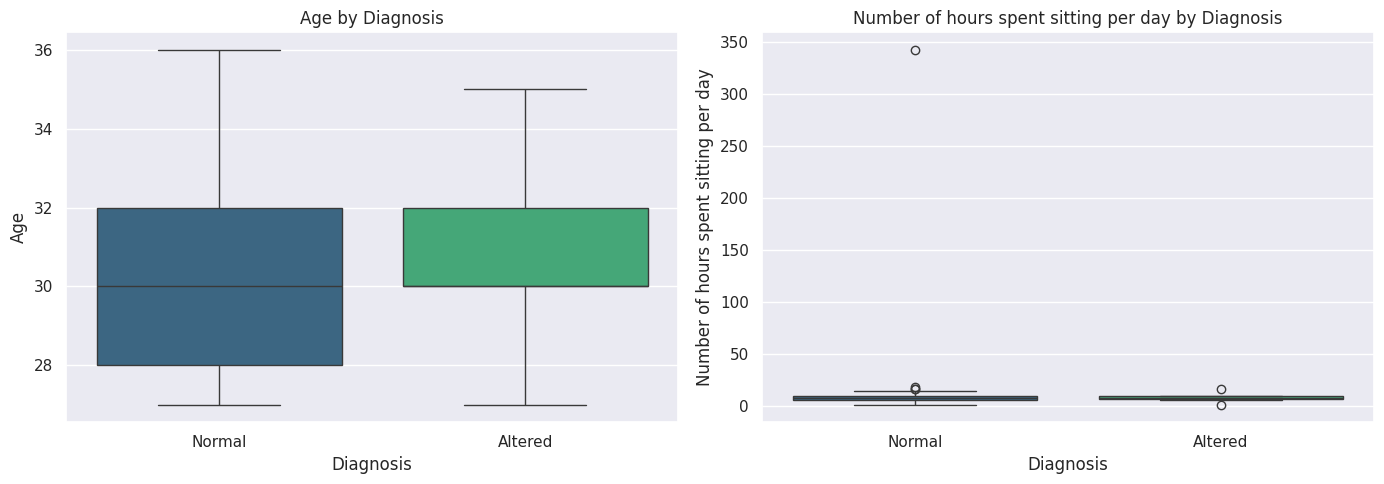

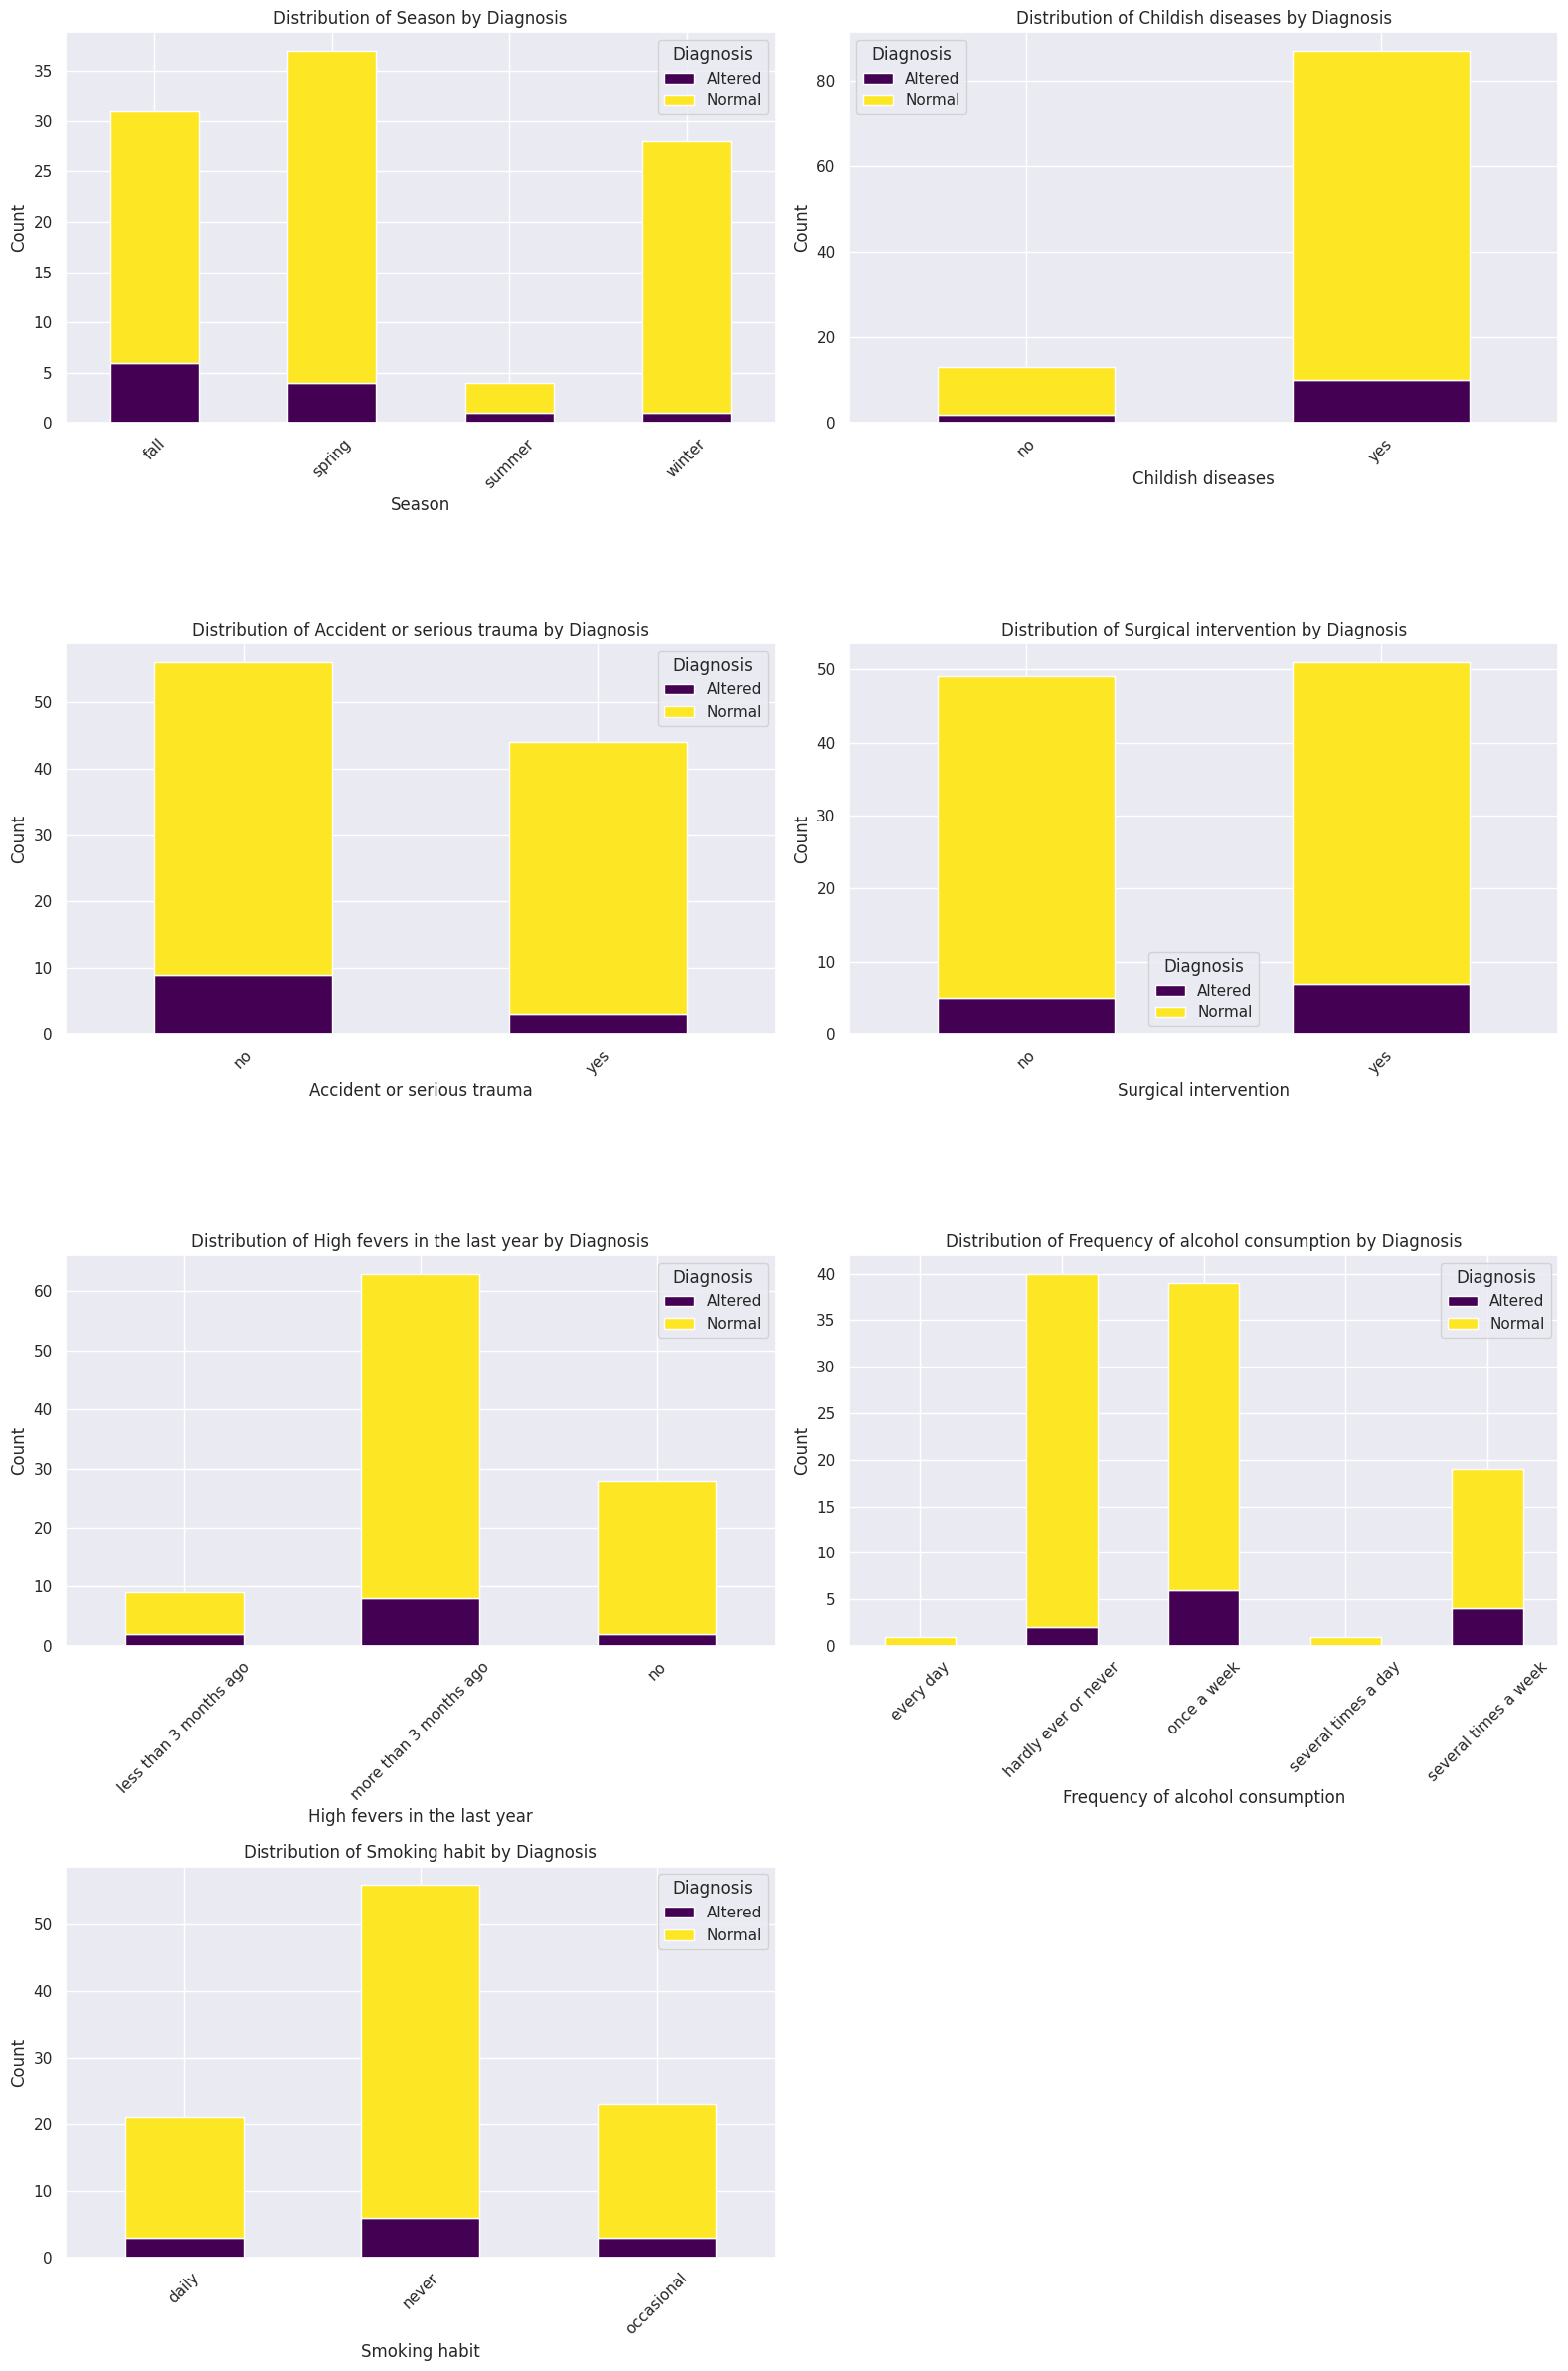

In [ ]:
target_col = 'Diagnosis'

# --- 1. Numerical Features vs. Target (Box Plots and Violin Plots) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    num_plots = len(numerical_cols)
    num_cols = 2 # Display 2 plots per row
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(7 * num_cols, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=target_col, y=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{col} by {target_col}')
        axes[i].set_xlabel(target_col)
        axes[i].set_ylabel(col)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns to plot against target.")


# --- 2. Categorical Features vs. Target (Count Plots / Stacked Bar Charts) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the target column itself from this loop
categorical_cols = [col for col in categorical_cols if col != target_col]

if len(categorical_cols) > 0:
    num_plots = len(categorical_cols)
    num_cols = 2
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        # Use pd.crosstab to get counts for stacked bar chart
        cross_tab = pd.crosstab(df[col], df[target_col])
        cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
        axes[i].set_title(f'Distribution of {col} by {target_col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns to plot against target.")

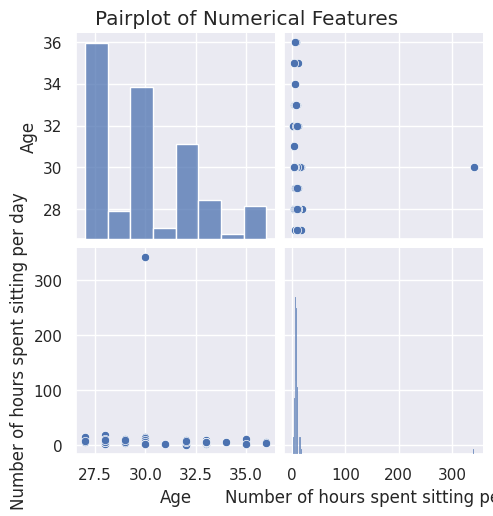

In [ ]:
sns.pairplot(df.select_dtypes(include = np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

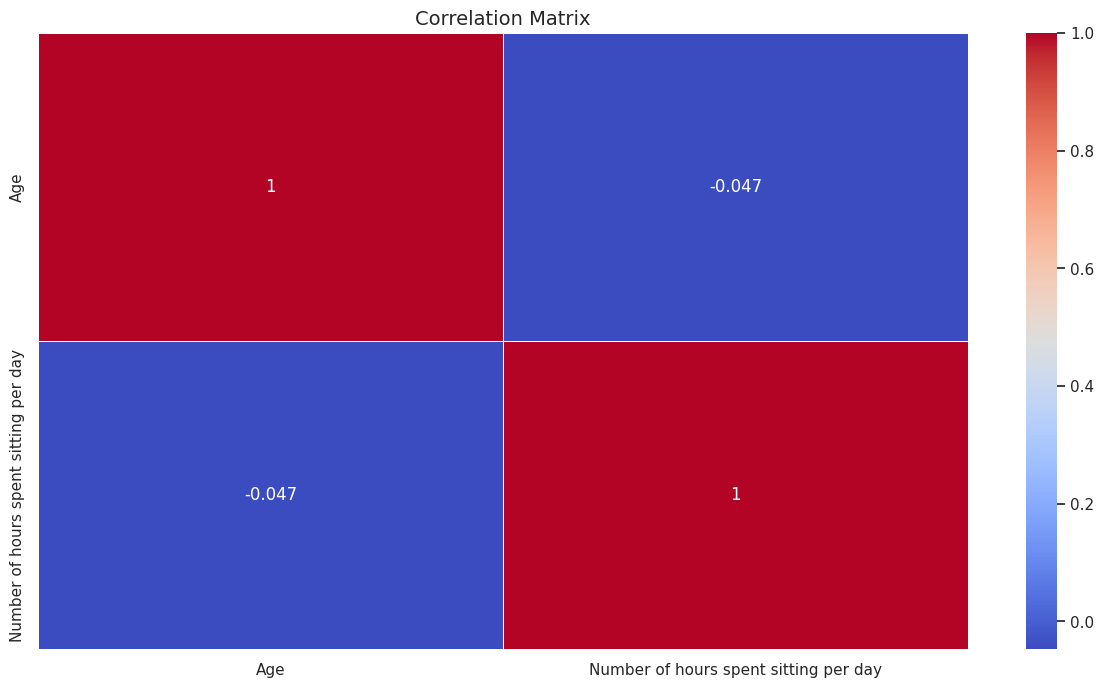

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Machine Learning

--- 2. TRAINING THE AI DOCTOR ---

--- DIAGNOSTIC REPORT ---
Confusion Matrix (Truth vs. Prediction):
[[18  0]
 [ 1  1]]

Accuracy Metrics:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20



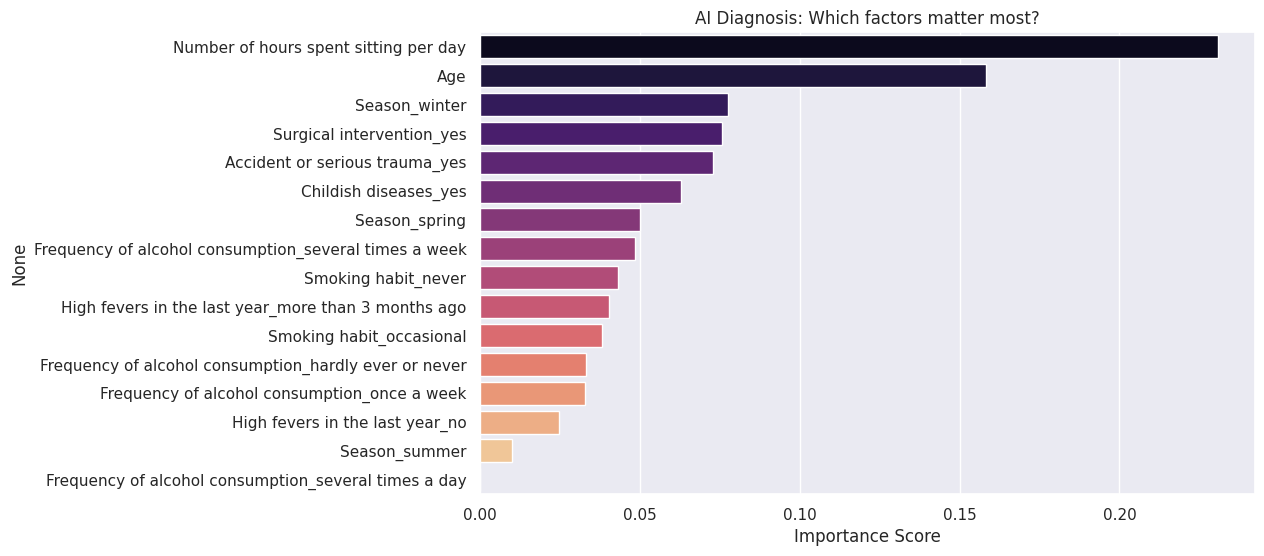

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("--- 2. TRAINING THE AI DOCTOR ---")

# 1. Data Preprocessing
# Convert Target 'Normal'/'Altered' to 0/1 for the AI
df['Target_Encoded'] = df[target_col].apply(lambda x: 0 if x == 'Normal' else 1)

# One-Hot Encode features (convert any text categories to numbers)
# We drop the original target text and the new target number from X
X = pd.get_dummies(df.drop([target_col, 'Target_Encoded'], axis=1), drop_first=True)
y = df['Target_Encoded']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Model Evaluation
preds = model.predict(X_test)

print("\n--- DIAGNOSTIC REPORT ---")
print("Confusion Matrix (Truth vs. Prediction):")
print(confusion_matrix(y_test, preds))

print("\nAccuracy Metrics:")
# Zero_division=0 handles cases where the model might be too perfect or fail on one class
print(classification_report(y_test, preds, zero_division=0))

# 5. Feature Importance Visualization
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='magma')
plt.title('AI Diagnosis: Which factors matter most?')
plt.xlabel('Importance Score')
plt.show()

# Thank You